# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [77]:
import os
os.getcwd()

'/workspaces/codespaces-jupyter/notebooks'

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

## Import Datasets

In [79]:
train = pd.read_csv('/workspaces/codespaces-jupyter/data/train.csv')
test = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv')

# Part One

## EDA

In [80]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [82]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Sweetviz

/home/codespace/.python/current/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/codespace/.python/current/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/codespace/.python/current/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/codespace/.python/current/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/codespace/.python/current/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/codespace/.python/current/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/h


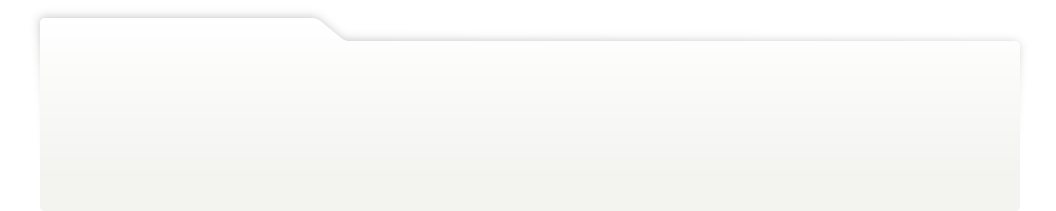
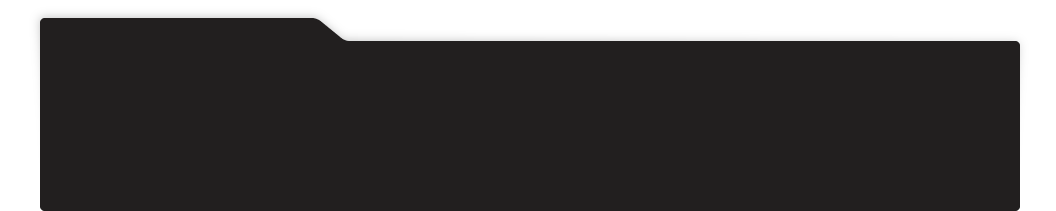
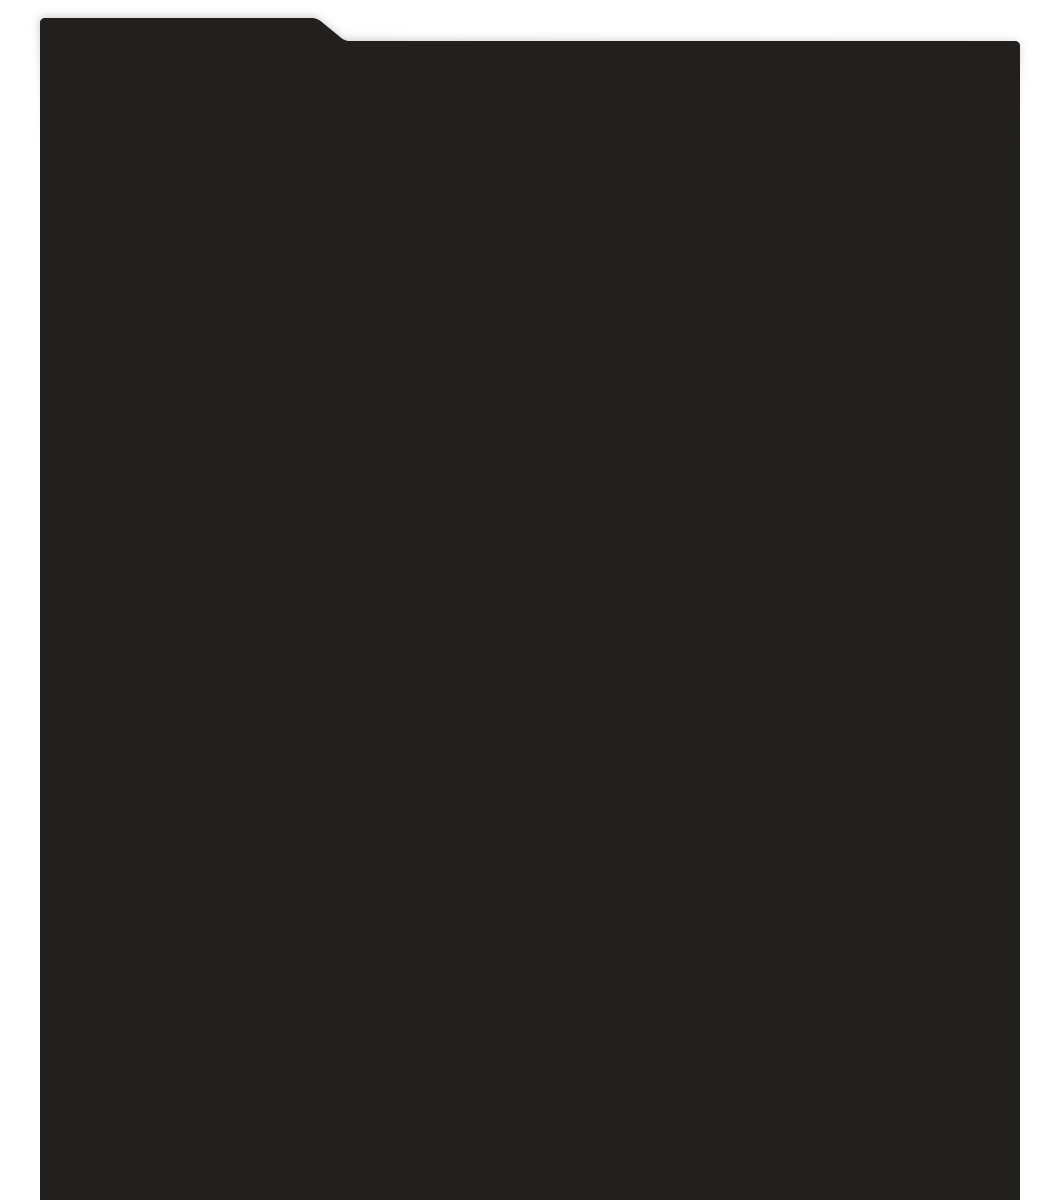
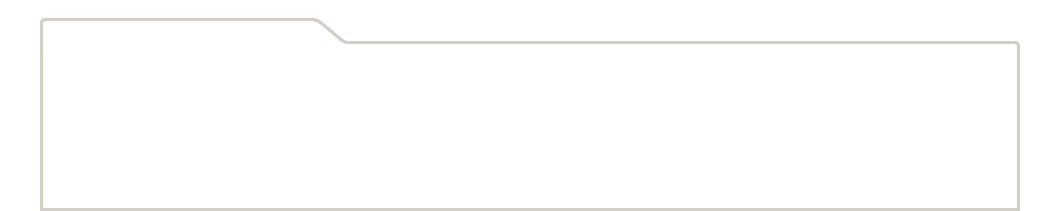
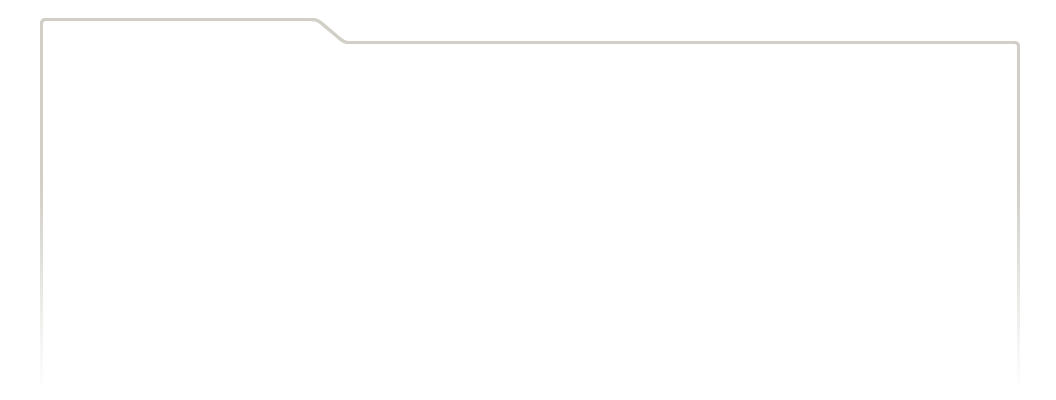
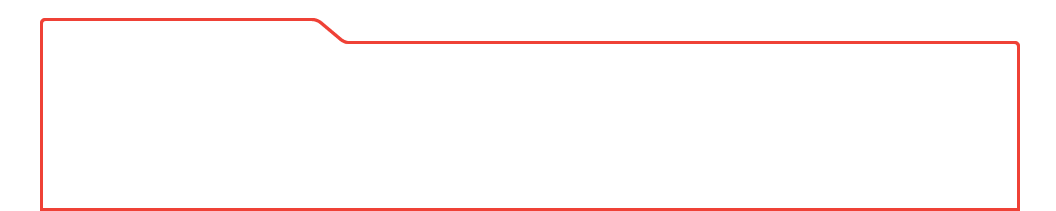
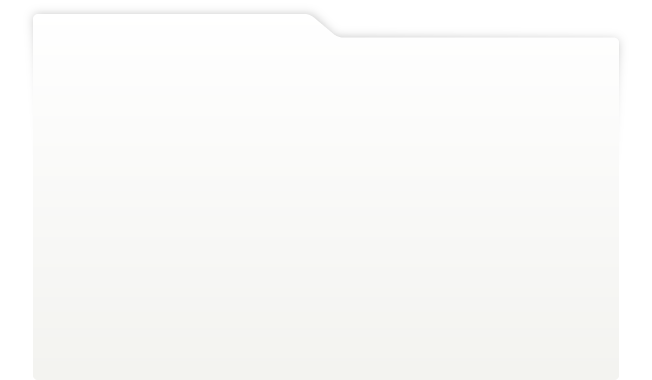
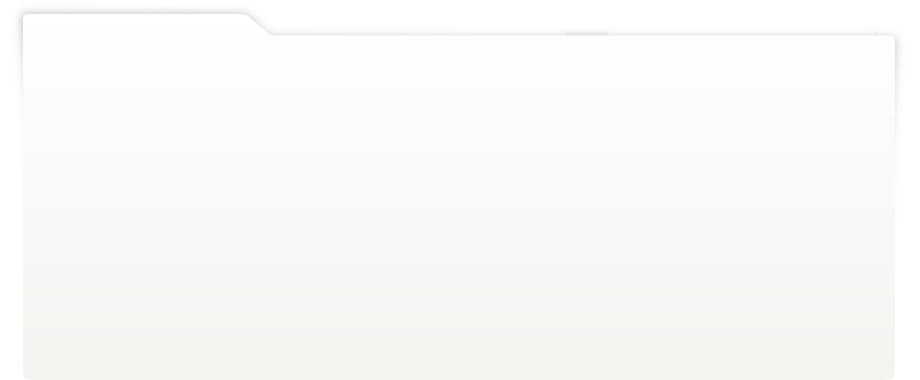
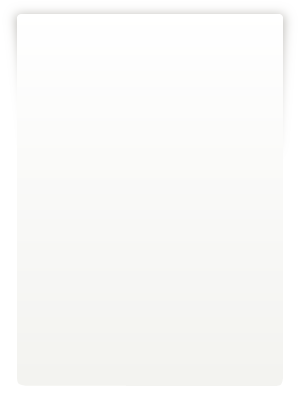
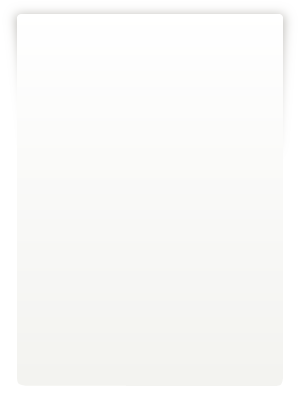
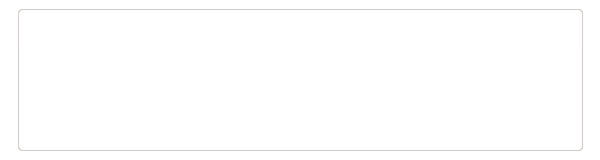
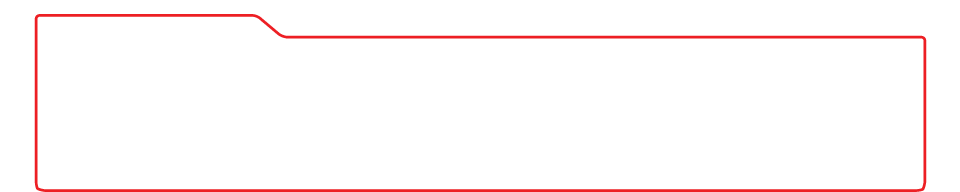
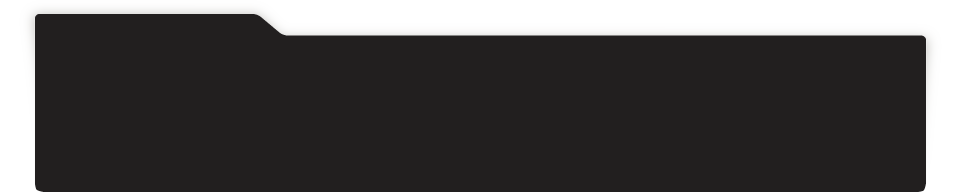
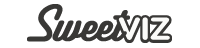
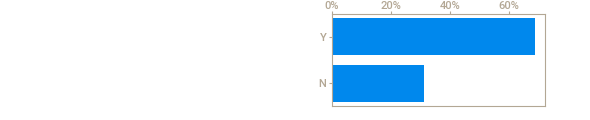
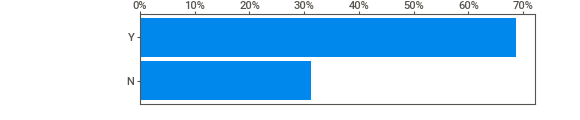
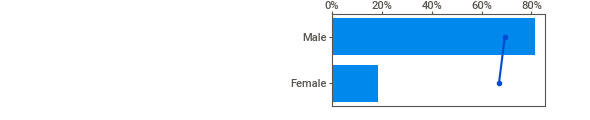
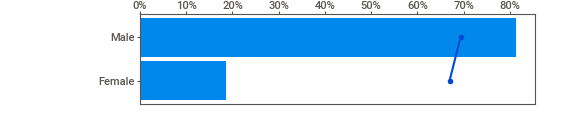
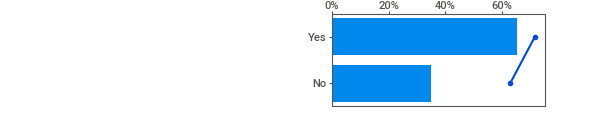
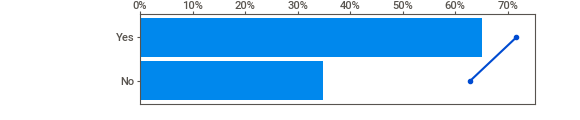
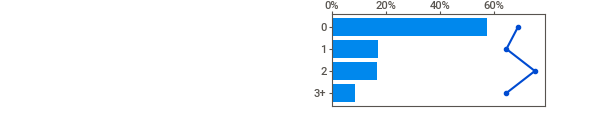
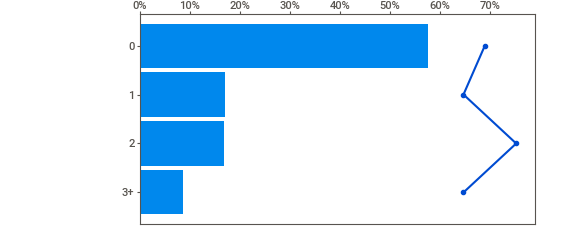
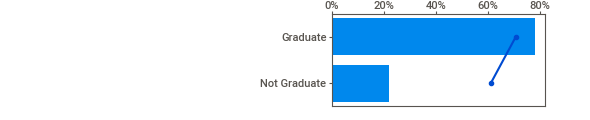
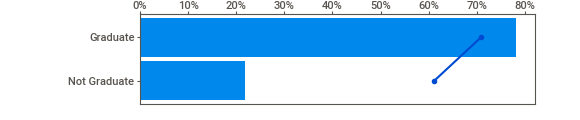
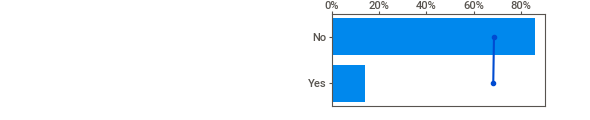
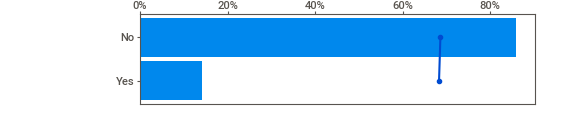
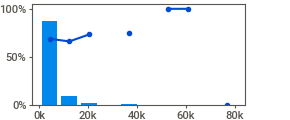
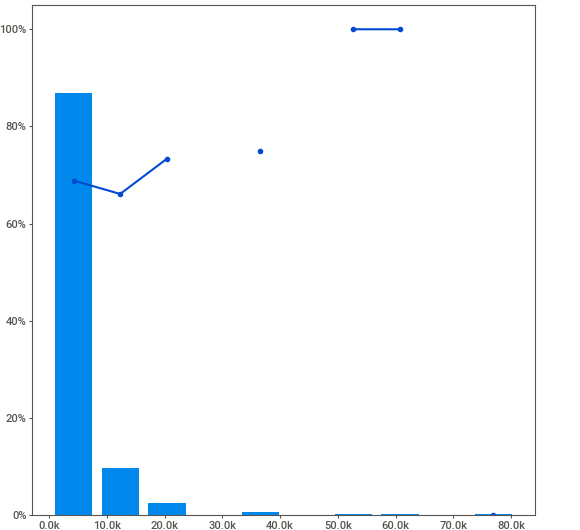
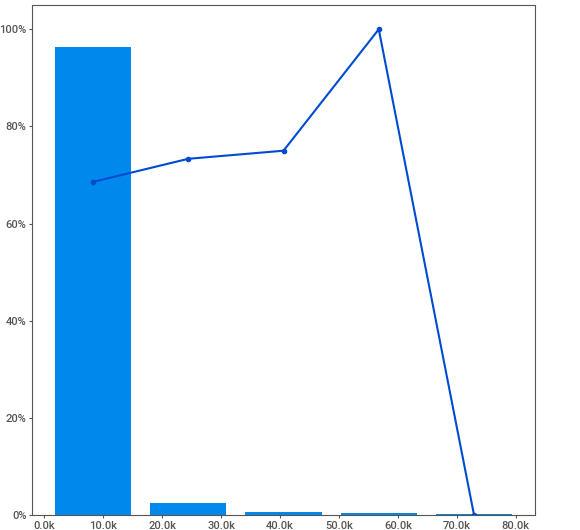
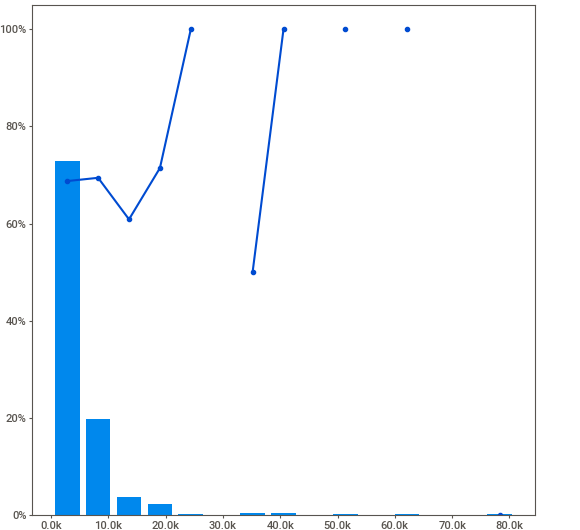
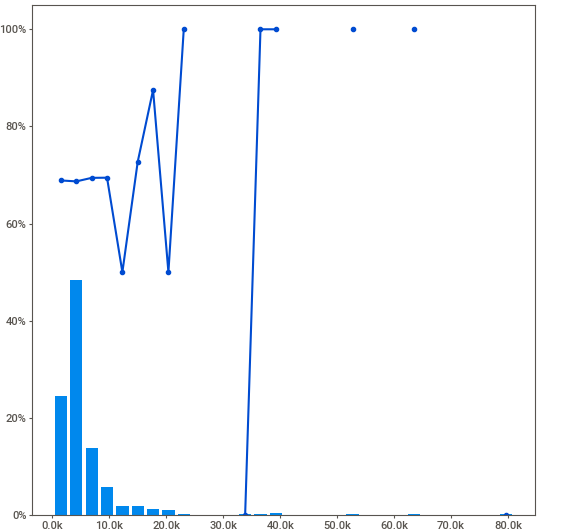
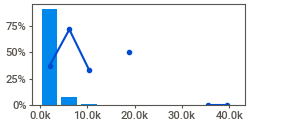
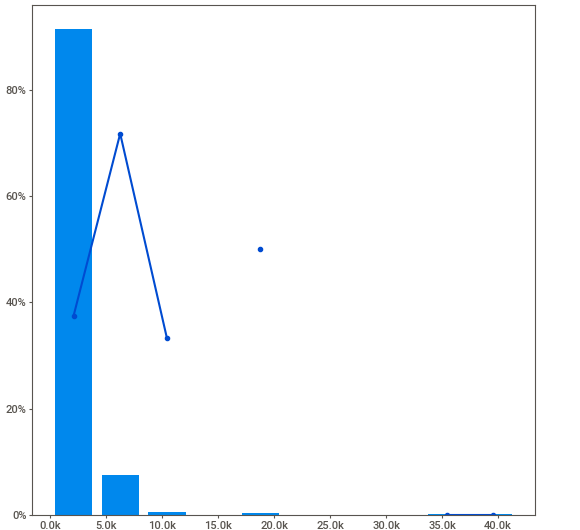
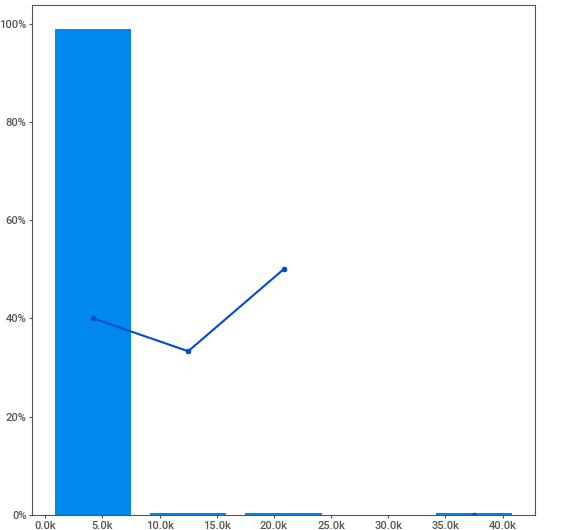
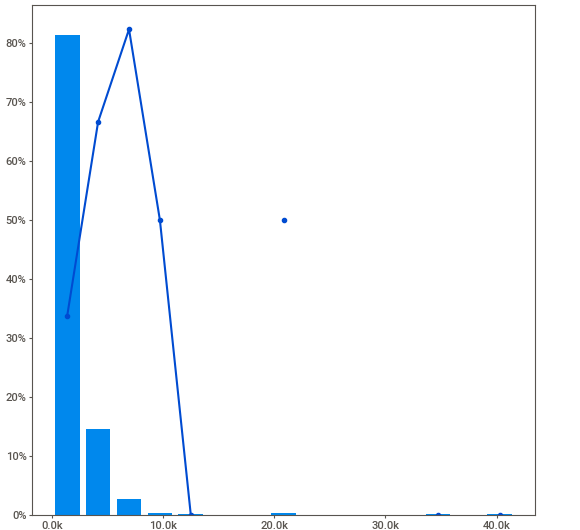
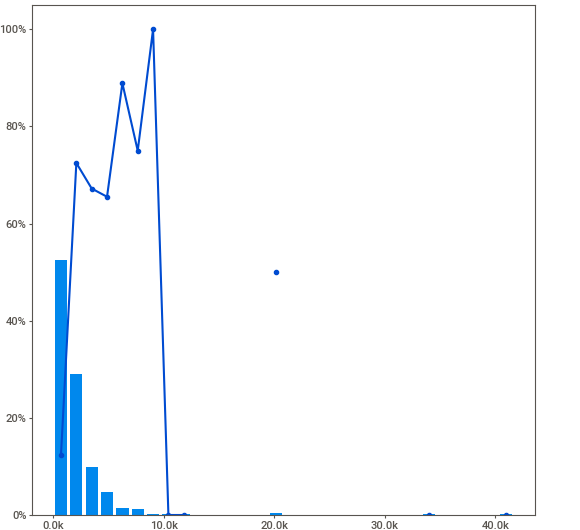
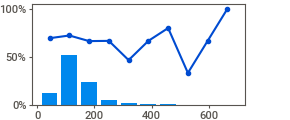
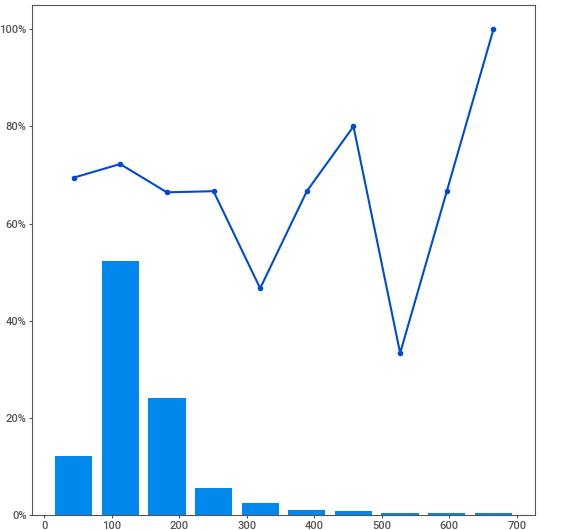
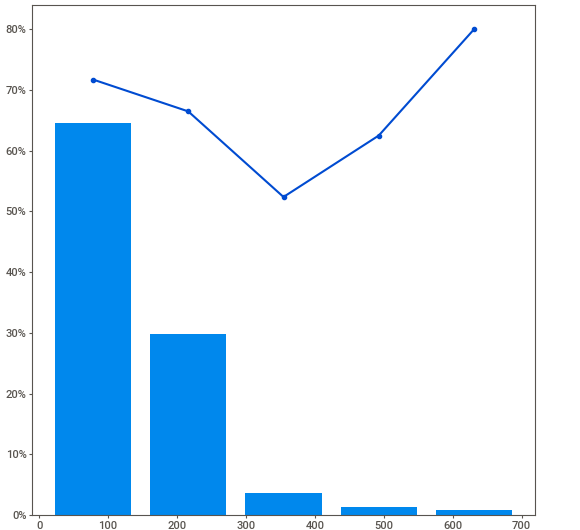
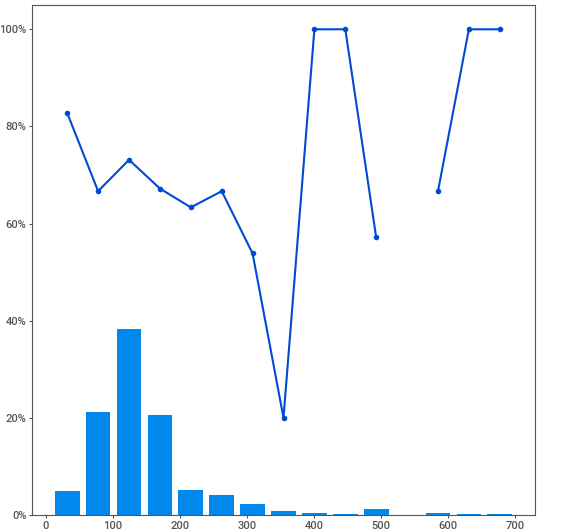
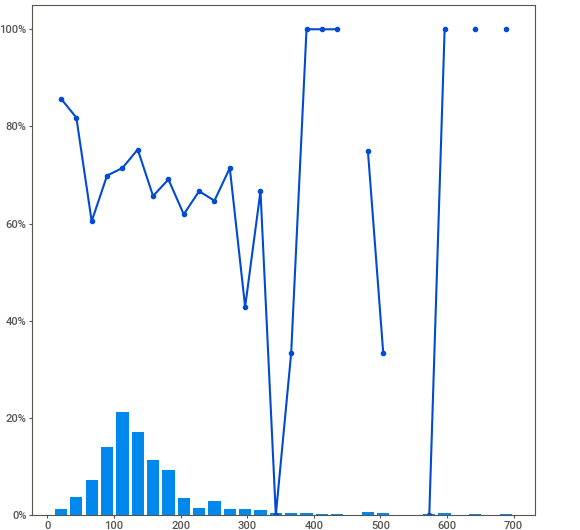
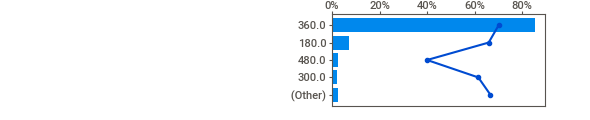
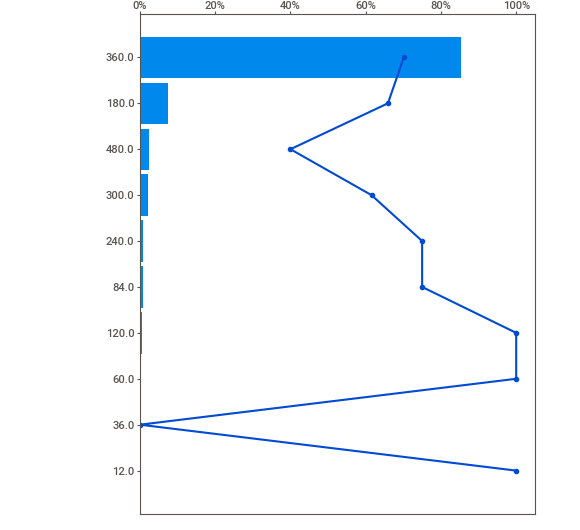
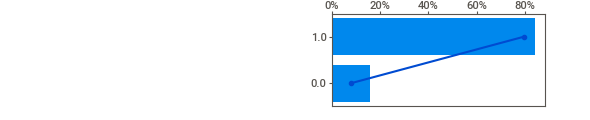
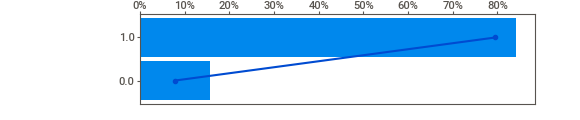
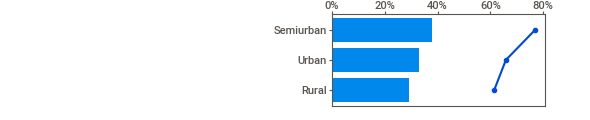
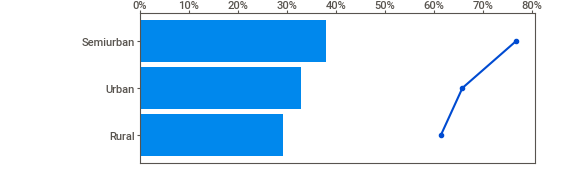
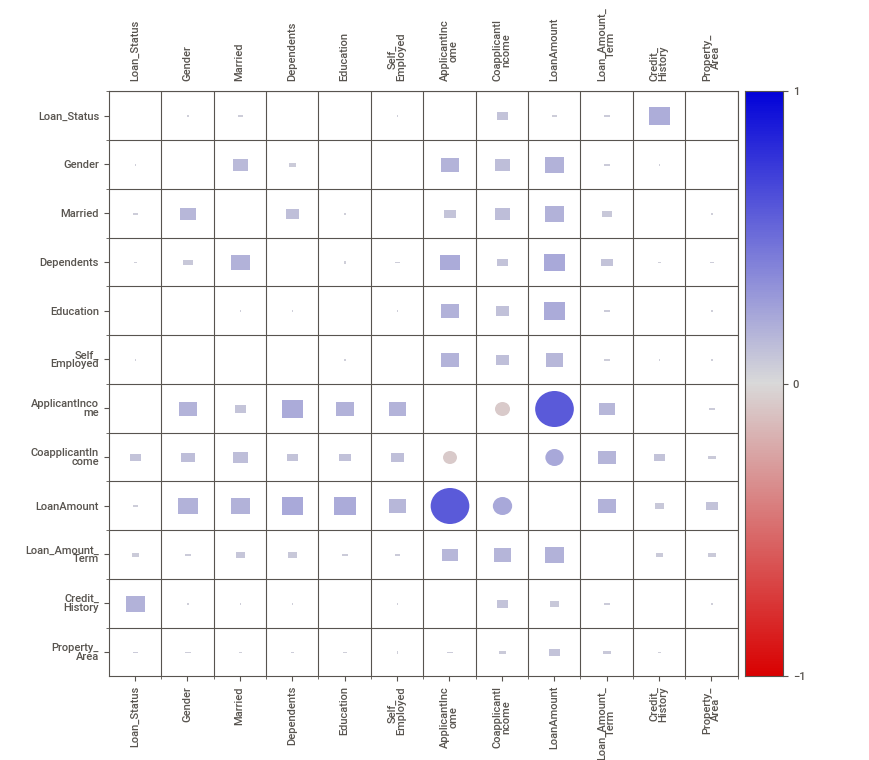
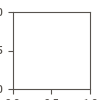

In [84]:
autoEDA = sweetviz.analyze(train,"Loan_Status")
autoEDA.show_notebook()

### About Data:
1. There are total of 981 datapoints of which we categorized 614 into train and 367 into test
2. Loan Status would be our response variable
3. Gender, Married, Education, Self Employed, Property Area, Credit_History are the categorical variables
4. Dependents, ApplicantIncome, CoapplicantIncome, LoanAmount are the continuous variables
5. Loan Amount Term should ideally be handled as Categorical, as this is not a continuous term

### Train Data Distribution:
1. The data is imbalanced with having more of Loan Status non defaulted 
2. Since the credit history is again got lot of data with Credit History, we could further explore how credit history is associated with the Loan Status. From the initial studies, we can see that there is high correlation between the loan status and credit history
3. Loan Amount Term is again highly skewed with the 360 term loans
4. Again data is highly skewed in terms of Self employment, Education, Gender

### Target Variable:
1. One of the key variable for identifying the credit worthiness would be the credit history, although its not a great idea on relying on the credit history to determine the credit worthiness, from the given data it would be the best variable to identify them
2. All other variables have slight influence on the Loan Status

#### Note: We might have to gather more data in the weaker sections, so that our model itself won't be biased on the training data

#### It's not ideal look into test data distributions, we might get influenced to tweak the models in a certain way

###  EDA 


In [85]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

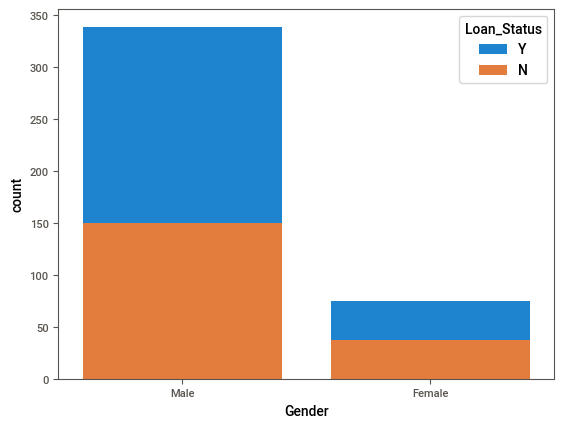

In [86]:
sns.countplot(x='Gender', hue='Loan_Status', data=train,dodge=False)
plt.show()

##### The default rates for both Male and Female remains almost same

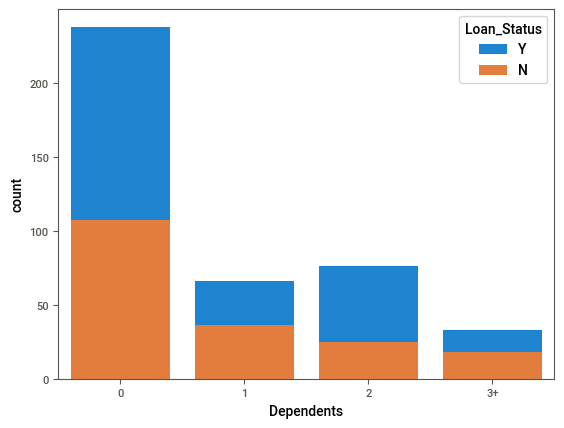

In [87]:
sns.countplot(x='Dependents', hue='Loan_Status', data=train,dodge=False)
plt.show()

#### The default rates for dependents across remains almost same

In [88]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

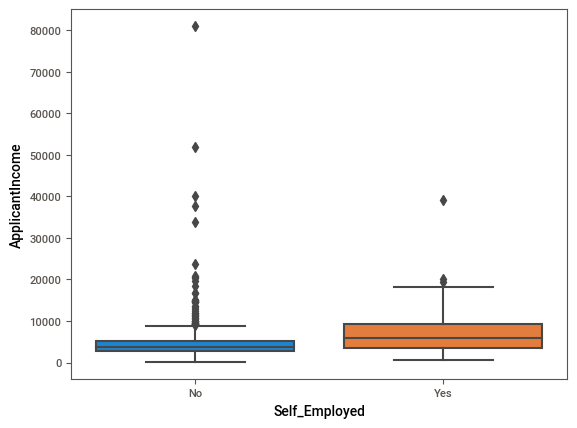

In [89]:
sns.boxplot(y='ApplicantIncome', x='Self_Employed', data=train)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

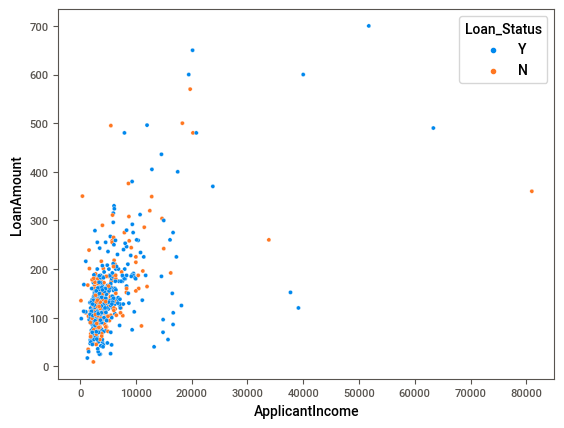

In [90]:
sns.scatterplot(y='LoanAmount', x='ApplicantIncome', hue='Loan_Status',data=train)

#### There is positive correlation between the Loan Amount and APplicant Income 

# Part Two

## Auto ML wth autosklearn


In [91]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# # convert string(text) to categorical
# X['Gender'] = X['Gender'].astype('category')
# X['Married'] = X['Married'].astype('category')
# X['Education'] = X['Education'].astype('category')
# X['Dependents'] = X['Dependents'].astype('category')
# X['Self_Employed'] = X['Self_Employed'].astype('category')
# X['Property_Area'] = X['Property_Area'].astype('category')
# #X['Credit_History'] = X['Credit_History'].astype('category')

# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [92]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

/home/codespace/.python/current/lib/python3.10/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Gender has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Married has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Dependents has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Education has

[WARNING] [2023-03-01 07:38:35,632:Client-AutoML(1):1292e5c0-b804-11ed-856f-6045bdc93572] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


In [93]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.8536585365853658


In [94]:
print(confusion_matrix(predictions_autoML, y_test))

[[21  1]
 [17 84]]


In [95]:
precision_score(y_test,predictions_autoML)

0.8316831683168316

In [96]:
recall_score(y_test,predictions_autoML)

0.9882352941176471

## Bespoke ML sklearn

### Data Preparation

In [97]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

##### As the Gender,Married,Dependents,Education,Self Employed,Loan AMount Term, Credit History has very few missing values, it would be better to fill those with most frequent rather than applying any high level models

In [131]:
numeric_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount']
cat_cols =['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area']

In [144]:
cv=5

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, cat_cols)
])

skf = StratifiedKFold(n_splits=cv)
fold_indices = skf.split(X, y)

precision_scores = []
recall_scores = []

label_encoder = LabelEncoder()

for train_indices, test_indices in fold_indices:
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression()) 
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

print("Precision scores:", np.mean(precision_scores))
print("Recall scores:", np.mean(recall_scores))


Precision scores: 0.6894985664860925
Recall scores: 0.9525770308123249


In [145]:
cv=5

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, cat_cols)
])

skf = StratifiedKFold(n_splits=cv)
fold_indices = skf.split(X, y)

precision_scores = []
recall_scores = []

label_encoder = LabelEncoder()

for train_indices, test_indices in fold_indices:
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=1000)) 
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

print("Precision scores:", np.mean(precision_scores))
print("Recall scores:", np.mean(recall_scores))


Precision scores: 0.6980450857553662
Recall scores: 0.8766666666666667
